<a href="https://colab.research.google.com/github/SAAI-2020/AI-Driven-Network-Anomaly-Detection-and-Traffic-Analysis-On-AWS-Cloud/blob/main/Network_Traffic_Anomaly_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flowlogs.txt to flowlogs.txt


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]
column_names = ['version', 'account', 'eni', 'srcaddr', 'dstaddr', 'srcport', 'dstport', 'protocol', 'packets', 'bytes', 'start', 'end', 'action', 'logstatus']
df = pd.read_csv(filename, sep=r'\s+', header=None, names=column_names, engine='python', on_bad_lines='warn', skiprows=2)
df.head()

,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus
0,172.31.0.5,443,51500,6,12,3456,1609459200,1609459260,ACCEPT,OK,2.0,NaN,NaN,NaN
1,123456789,eni-001,192.168.1.10,172.31.0.6,443,51510,6,5,789,1609459300,NaN,NaN,NaN,NaN
2,1609459360,ACCEPT,OK,2,123456789,eni-001,10.0.0.12,172.31.0.8,80,34210,6.0,NaN,NaN,NaN
3,200,50000,1609459400,1609459460,ACCEPT,OK,2,123456789,eni-001,10.0.0.12,NaN,NaN,NaN,NaN
4,8.8.8.8,53,41123,17,2,200,1609459500,1609459560,ACCEPT,OK,2.0,123456789.0,NaN,NaN


In [ ]:
df.columns = column_names
df_numeric = df[['srcport', 'dstport', 'packets','bytes']]
df_numeric.head()

,srcport,dstport,packets,bytes
0,3456,1609459200,ACCEPT,OK
1,51510,6,789,1609459300
2,eni-001,10.0.0.12,80,34210
3,OK,2,eni-001,10.0.0.12
4,200,1609459500,ACCEPT,OK


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('srcport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('dstport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('packets').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('bytes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['dstport'].value_counts()
    for x_label, grp in _df_4.groupby('srcport')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('srcport')
_ = plt.ylabel('dstport')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['packets'].value_counts()
    for x_label, grp in _df_5.groupby('dstport')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('dstport')
_ = plt.ylabel('packets')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bytes'].value_counts()
    for x_label, grp in _df_6.groupby('packets')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('packets')
_ = plt.ylabel('bytes')

In [ ]:
for col in ['srcport', 'dstport', 'packets', 'bytes']:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [ ]:
df_clean = df.dropna(subset=['srcport', 'dstport', 'packets', 'bytes'])

In [ ]:
df_clean = df.fillna(0)

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df_clean[['srcport', 'dstport', 'packets', 'bytes']])

In [ ]:
anomalies = df[df['anomaly'] == -1]
anomalies.head()

,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus,anomaly
1,123456789,eni-001,192.168.1.10,172.31.0.6,443,51510.0,6.0,5,789.0,1.609459e+09,NaN,NaN,NaN,NaN,-1


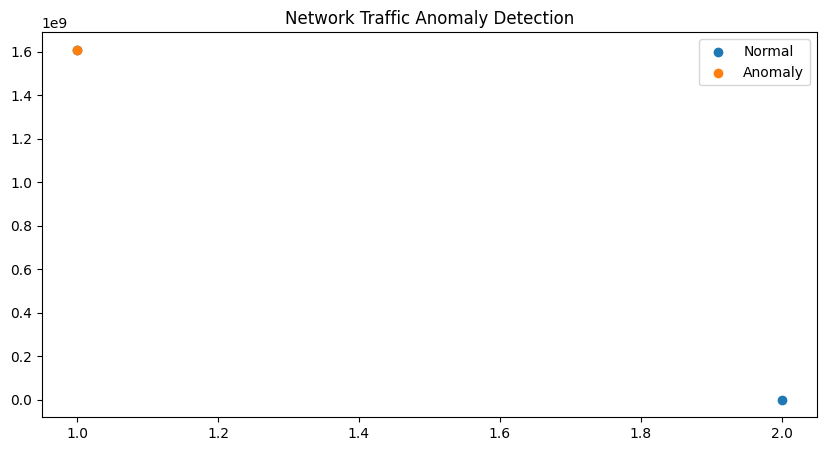

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(df.index, df['bytes'], label="Normal")
plt.scatter(anomalies.index, anomalies['bytes'], label="Anomaly")
plt.legend()
plt.title("Network Traffic Anomaly Detection")
plt.show()

In [ ]:
anomalies.to_csv("anomaly_output.csv", index=False)


In [ ]:
print("Total Logs:", len(df))
print("Anomaly Detected:", len(anomalies))
print("Anomaly Percentage:", round(len(anomalies)/len(df)*100, 2), "%")

Total Logs: 7
Anomaly Detected: 1
Anomaly Percentage: 14.29 %


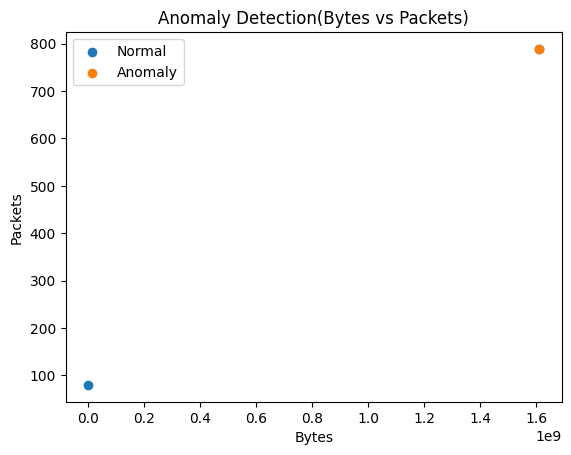

In [ ]:
plt.scatter(df['bytes'], df['packets'], label="Normal")
plt.scatter(anomalies['bytes'], anomalies['packets'], label="Anomaly")
plt.xlabel("Bytes")
plt.ylabel("Packets")
plt.title("Anomaly Detection(Bytes vs Packets)")
plt.legend()
plt.show()

<Axes: >

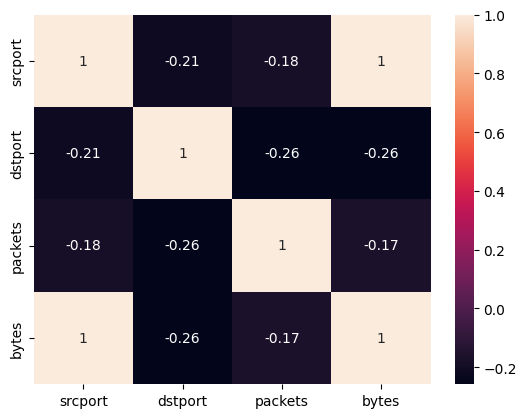

In [ ]:
import seaborn as sns
sns.heatmap(df_clean[['srcport', 'dstport', 'packets', 'bytes']].corr(), annot=True)

In [30]:
cols = ['srcport', 'dstport', 'packets', 'bytes']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')
df_clean = df.dropna(subset=cols)
df_clean.head()

,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus,anomaly
1,123456789,eni-001,192.168.1.10,172.31.0.6,443,51510.0,6.0,5,789.0,1.609459e+09,NaN,NaN,NaN,NaN,-1


In [31]:
df_numeric = df_clean[['srcport', 'dstport', 'packets', 'bytes']]
df_numeric.head()

,srcport,dstport,packets,bytes
1,51510.0,6.0,789.0,1.609459e+09


In [33]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
df_clean['anomaly'] = model.fit_predict(df_numeric)

df_anomalies = df_clean[df_clean['anomaly'] == -1]
df_normals = df_clean[df_clean['anomaly'] == 1]

df_anomalies.head()

/tmp/ipython-input-2815784920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly'] = model.fit_predict(df_numeric)


,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus,anomaly


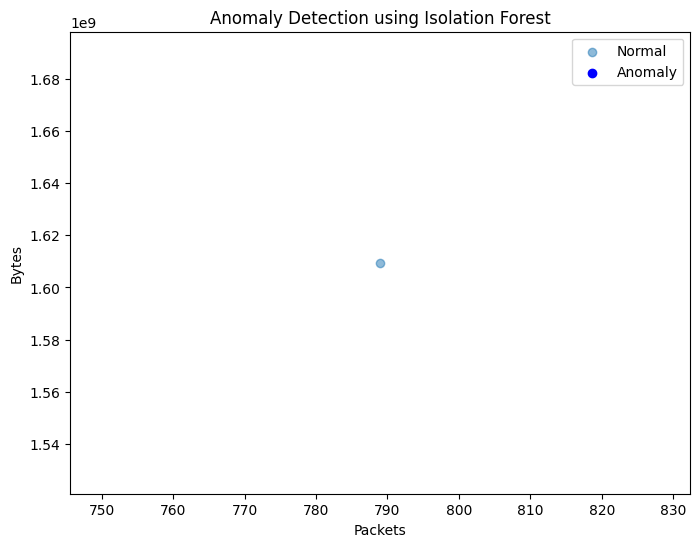

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_numeric['packets'], df_numeric['bytes'], label='Normal', alpha=0.5)
plt.scatter(df_anomalies['packets'], df_anomalies['bytes'], color='blue', label='Anomaly')
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.legend()
plt.title('Anomaly Detection using Isolation Forest')
plt.show()

In [35]:
print("Normal Traffic:", len(df_normals))
print("Anomalies Detected:", len(df_anomalies))

Normal Traffic: 1
Anomalies Detected: 0


In [36]:
cols = ['srcport', 'dstport', 'packets', 'bytes']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')

df_clean = df.dropna(subset=cols).copy()
df_clean.head()

,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus,anomaly
1,123456789,eni-001,192.168.1.10,172.31.0.6,443,51510.0,6.0,5,789.0,1.609459e+09,NaN,NaN,NaN,NaN,-1


In [43]:
df_numeric = df_clean[['srcport', 'dstport' , 'packets', 'bytes']]

In [44]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
df_clean['anomaly'] = model.fit_predict(df_numeric)

df_anomalies = df_clean[df_clean['anomaly'] == -1]
df_normals = df_clean[df_clean['anomaly'] == 1]

df_anomalies.head()

/tmp/ipython-input-2815784920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly'] = model.fit_predict(df_numeric)


,version,account,eni,srcaddr,dstaddr,srcport,dstport,protocol,packets,bytes,start,end,action,logstatus,anomaly


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['srcport']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'srcport'}, axis=1)
              .sort_values('srcport', ascending=True))
  xs = counted['srcport']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('srcport', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('srcport')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['dstport']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'dstport'}, axis=1)
              .sort_values('dstport', ascending=True))
  xs = counted['dstport']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('dstport', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dstport')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['packets']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'packets'}, axis=1)
              .sort_values('packets', ascending=True))
  xs = counted['packets']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('packets', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('packets')
_ = plt.ylabel('count()')

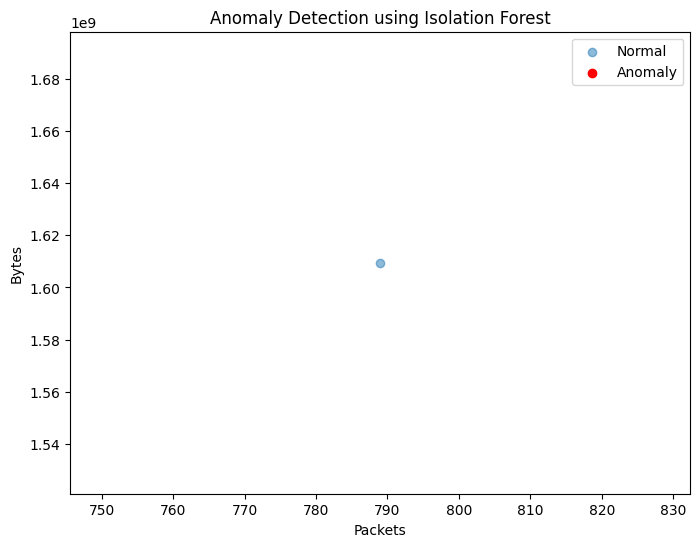

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_numeric['packets'], df_numeric['bytes'], label='Normal', alpha=0.5)
plt.scatter(df_anomalies['packets'], df_anomalies['bytes'], color = 'red', label = 'Anomaly')
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.legend()
plt.title('Anomaly Detection using Isolation Forest')
plt.show()

In [46]:
print("Normal Traffic:", len(df_normals))
print("Anomalies detected:", len(df_anomalies))

Normal Traffic: 1
Anomalies detected: 0
